In [ ]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import json
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.text import Annotation
from matplotlib import rc
import seaborn as sns
import warnings
from hierarchical_model import UniformBHSM, plot_galaxy
warnings.simplefilter('ignore', UserWarning)

In [4]:
BHSM_OUTPUT_FILE = 'n129d1000t500.pickle'

In [5]:
merged_arms = pd.read_pickle('lib/merged_arms.pickle')

In [6]:
res = UniformBHSM.load(BHSM_OUTPUT_FILE)
bhsm = res.pop('bhsm')
trace = res.pop('trace')

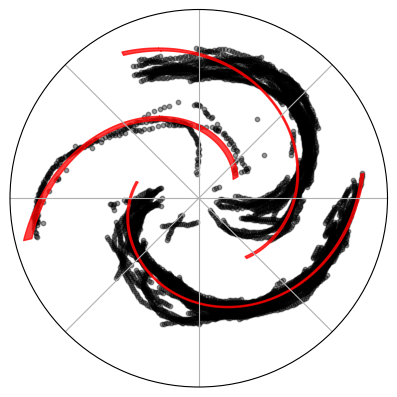

In [7]:
plt.figure(figsize=(5, 5), dpi=100)
plt.subplot(1, 1, 1, projection='polar')
plot_galaxy(20902011, bhsm=bhsm, trace=trace, markersize=10)

plt.xticks(plt.xticks()[0], [])
plt.yticks([]);

In [8]:
N = 4
gal_choice_ids = np.array([
    20902001, 20902034, 20902024, 20902026,
    20902040, 20902055, 20902051, 20902053,
    20901998, 20902063, 20902064, 20902067,
    20902077, 21096850, 21096867, 20902011,
])
assert len(gal_choice_ids) == len(np.unique(gal_choice_ids))

[[20902001 20902034 20902024 20902026]
 [20902040 20902051 20902053 20902063]
 [20902064 20902077 21096850 20902055]
 [20901998 20902067 20902011 21096867]]


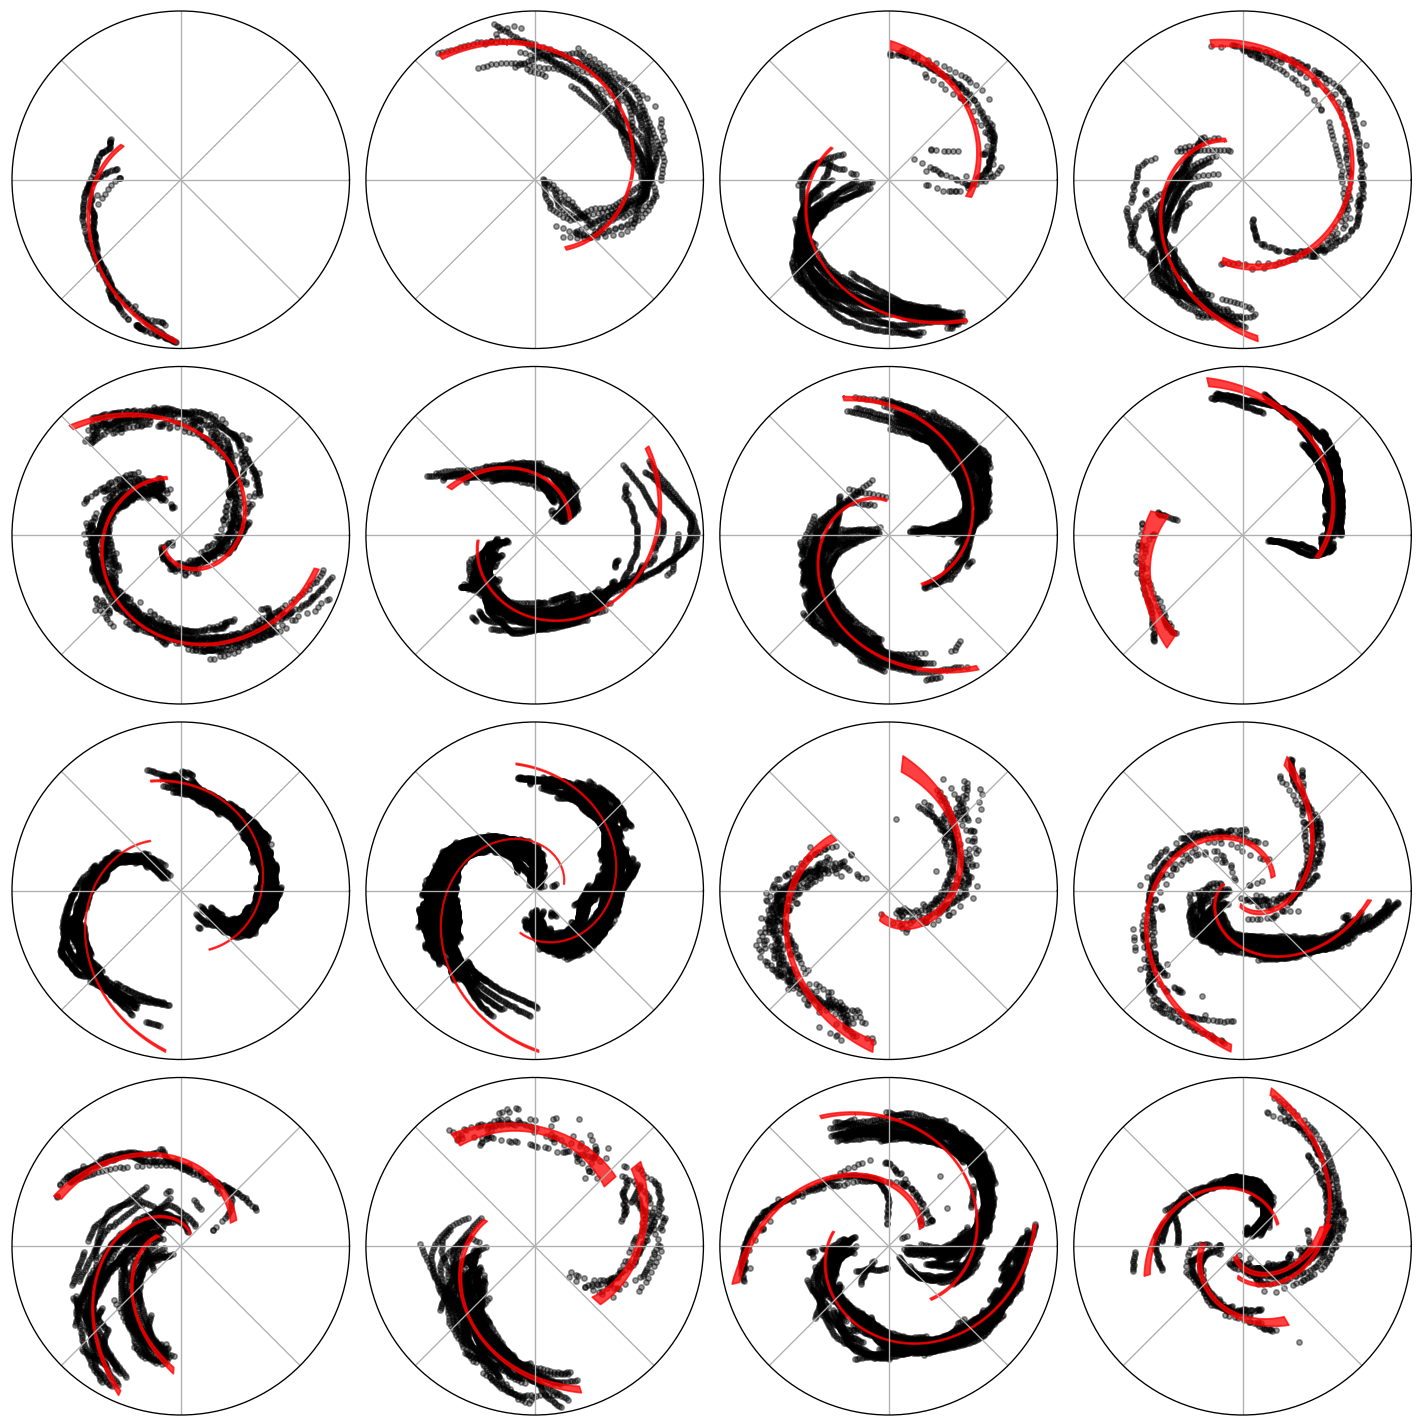

In [12]:
# sort by number of arms
gal_choice_ids = bhsm.galaxies.loc[gal_choice_ids].str.len().sort_values().index.values
print(gal_choice_ids.reshape(N, N))
plt.figure(figsize=(12, 12), dpi=120)
for i in range(N):
    for j in range(N):
        idx = N * i + j
        plt.subplot(N, N, idx + 1, projection='polar')
        plot_galaxy(
            gal_choice_ids[idx],
            bhsm=bhsm,
            trace=trace,
            markersize=10,
#             plot_scatter=False,
            rasterize_scatter=True
        )
        plt.xticks(plt.xticks()[0], [])
        plt.yticks([])
plt.tight_layout()
plt.savefig('plots/example-spiral-fits.pdf', bbox_inches='tight')
plt.savefig('plots/example-spiral-fits.png', bbox_inches='tight')

We can also plot the fit to each galaxy individually:

In [13]:
# os.makedirs('plots/fit_results', exist_ok=True)
# with tqdm(bhsm.galaxies.index) as bar:
#     for subject_id in bar:
#         plt.figure(figsize=(5, 5), dpi=100)
#         plt.subplot(1, 1, 1, projection='polar')
#         plot_galaxy(subject_id, bhsm=bhsm, trace=trace, markersize=10)

#         plt.xticks(plt.xticks()[0], [])
#         plt.yticks([]);
#         plt.savefig(f'plots/fit_results/{subject_id}.jpg')
#         plt.close()

A flick through these images indicates a handful of erroneous fits (generally due to the "unwrapping" process (converting from x,y to r, $\theta$) failing. Most fits, however, have succeeded well.